# import libraries and clean data

In [3]:
#import necessary libraries

#for importing data and wrangling
import pandas as pd
import numpy as np

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

#additional stop words
from spacy.lang.en.stop_words import STOP_WORDS

from collections import Counter

In [4]:
# read in the data
df = pd.read_csv(r'data/bible_data_set_kjv.csv', encoding="cp1252")

In [5]:
df.head(10)

,citation,book,chapter,verse,text
0,Genesis 1:1,Genesis,1,1,In the beginning God created the heaven and th...
1,Genesis 1:2,Genesis,1,2,"And the earth was without form, and void; and ..."
2,Genesis 1:3,Genesis,1,3,"And God said, Let there be light: and there wa..."
3,Genesis 1:4,Genesis,1,4,"And God saw the light, that it was good: and G..."
4,Genesis 1:5,Genesis,1,5,"And God called the light Day, and the darkness..."
5,Genesis 1:6,Genesis,1,6,"And God said, Let there be a firmament in the ..."
6,Genesis 1:7,Genesis,1,7,"And God made the firmament, and divided the wa..."
7,Genesis 1:8,Genesis,1,8,And God called the firmament Heaven. And the e...
8,Genesis 1:9,Genesis,1,9,"And God said, Let the waters under the heaven ..."
9,Genesis 1:10,Genesis,1,10,And God called the dry land Earth; and the gat...


In [6]:
# list of relevant books (the Gospel books)
books = ['Matthew','Mark','Luke','John']

In [7]:


def change_book_text(row):
    ''' Function to clean the book names and make them representation standard'''
    
    book = row['book']
    
    if 'matthew' in book.lower():
        book = 'matthew'
    elif 'mark' in book.lower():
        book = 'mark'
    elif 'luke' in book.lower():
        book = 'luke'
    elif 'john' in book.lower():
        book = 'john'

    
    else:
        book = book[:-1]
    
    return book

In [8]:
# filter the dataframe to only those in the book list
df=df[df.book.isin(books)]
#filter to only the book and text columns
df=df[['book','text']]
# fix book names
df['book'] = df.apply(change_book_text, axis=1)

In [9]:
#verify all the names are fixed
df.book.unique()

array(['matthew', 'mark', 'luke', 'john'], dtype=object)

In [10]:
df.head()

,book,text
23145,matthew,"The book of the generation of Jesus Christ, th..."
23146,matthew,Abraham begat Isaac; and Isaac begat Jacob; an...
23147,matthew,And Judas begat Phares and Zara of Thamar; and...
23148,matthew,And Aram begat Aminadab; and Aminadab begat Na...
23149,matthew,And Salmon begat Booz of Rachab; and Booz bega...


In [11]:
# update stopwords
# DISCLAIMER: I DID NOT DO IT FOR THE GOSPELS

stop_words = {'unto','said','man','thee','hath','go','done','neither','came','begat','whosoever','take'
             'brought','eunuch','ye','saith'}
STOP_WORDS.update(stop_words) #spacy stop words
STOPWORDS.update(stop_words) #WordCloud stop words

## Method 1 | UseWordCloud to process the text

In [12]:
# WordCloud needs one string of text to generate the wordcloud image, 
# so we will filter and combine the text of one candidate

#filter the df to one candidate, and create a list of responses from them
text = df[df.book.isin(['matthew', 'mark', 'luke', 'john'])].text.tolist() 
# join the list and lowercase all the words
text = ' '.join(text).lower()
#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,background_color='white',
                      collocations=True).generate(text)

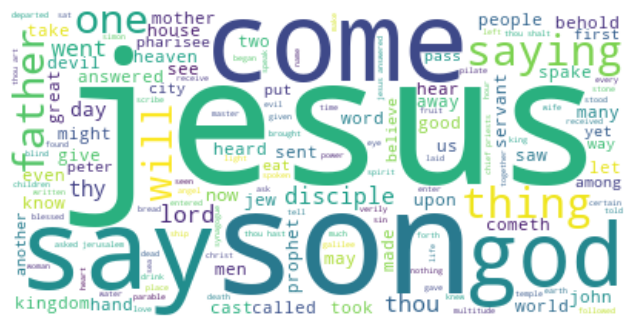

In [13]:
plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

# word cloud image

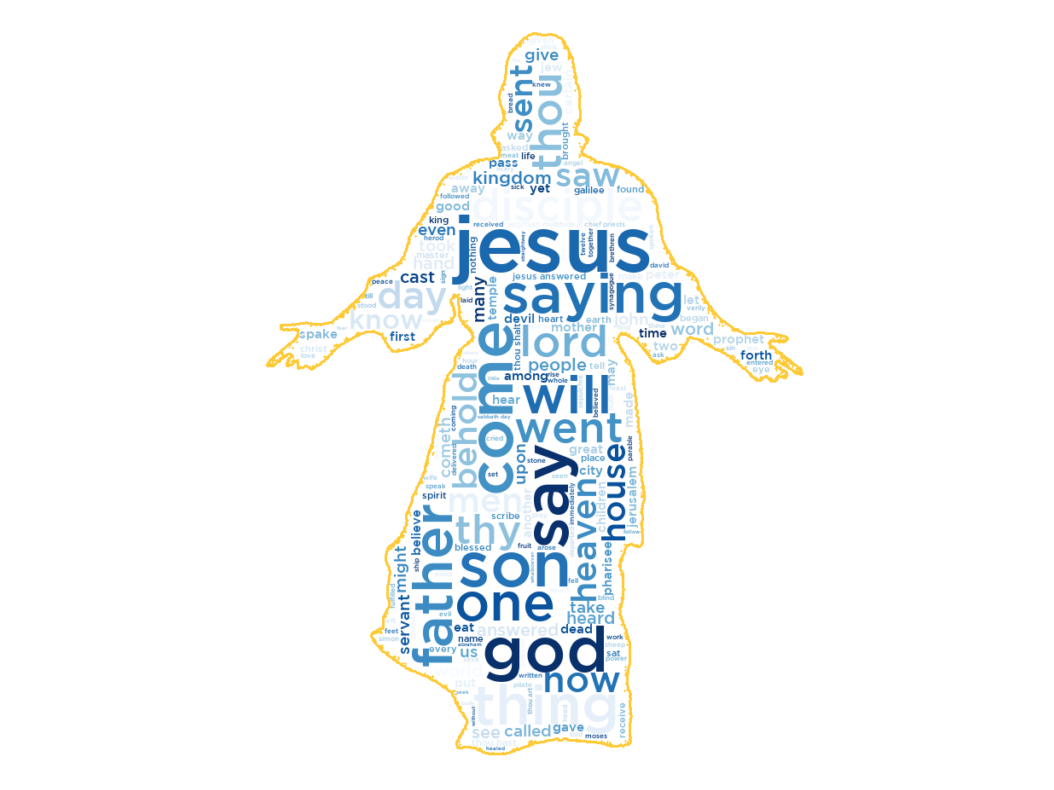

In [14]:
### colormap

# open the image and use np.array to transform the file to an array

cand_mask=np.array(Image.open('photos\\jesus2.png'))

# this line will take all values greater than 3 and make them 255 (white)
# if they are less than 3, they will be whatever value they are in the array
cand_mask=np.where(cand_mask > 3, 255, cand_mask)


wordcloud = WordCloud(font_path = 'font\\GothamMedium.ttf',
                      background_color='white',
                      contour_color='#ffca38',
                      mask=cand_mask, colormap='Blues',
                      contour_width=1.5).generate(text)


#plot
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
# save the file
wordcloud.to_file("wordclouds\\jesus_wordcloud-blue.png")

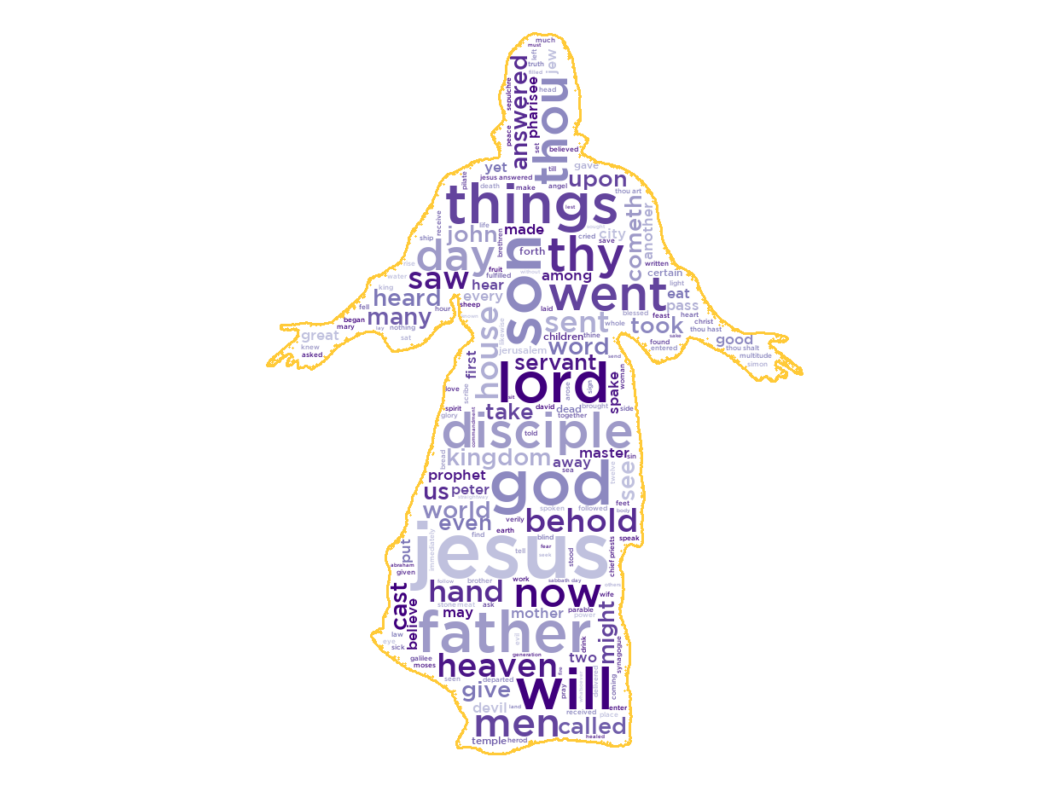

In [47]:
# import colormap from matplotlib as a matrix of colors
cmap = mpl.cm.Purples(np.linspace(0,1,15))
cmap = mpl.colors.ListedColormap(cmap[-10:,:-1]) # select only a subset of the matrix

#create and generate our wordcloud object
wordcloud = WordCloud(font_path = 'font\\GothamMedium.ttf',
                      background_color='white',
                      contour_color='#ffca38',
                      mask=cand_mask, colormap=cmap,
                      contour_width=1.5).generate(text)


#plot
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [48]:
# save the file
wordcloud.to_file("wordclouds\\jesus_wordcloud-purple.png")